In [1]:
!nvidia-smi

Wed Mar 16 16:41:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run this and the next cell only.
# Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 300, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (108/108), done.
remote: Total 300 (delta 72), reused 43 (delta 21), pack-reused 171
Receiving objects: 100% (300/300), 86.52 KiB | 2.40 MiB/s, done.
Resolving deltas: 100% (134/134), done.
***********************************************************************
Woo! Your instance has the right kind of GPU, a Tesla T4!
***********************************************************************



In [ ]:
# This will update the Colab environment and restart the kernel.  Don't run the next cell until you see the session crash.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:4 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:5 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:6 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:7 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:8 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:9 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:10 http://ppa.launchpad.net/ubuntu-toolchain-r/test/ubuntu bionic InRelease [20.8 kB]
Ign:11 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Get:12 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic/mai

In [1]:
# This will install CondaColab.  This will restart your kernel one last time.  Run this cell by itself and only run the next cell once you see the session crash.
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:24
🔁 Restarting kernel...


In [1]:
# you can now run the rest of the cells as normal
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [3]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>' 
!python rapidsai-csp-utils/colab/install_rapids.py stable
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.0
Uninstalling cffi-1.15.0:
  Successfully uninstalled cffi-1.15.0
  Using cached cffi-1.15.0-cp37-cp37m-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (427 kB)
Installing RAPIDS Stable 21.12
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: ...working... WARNING conda.core.solve:_add_specs(611): pinned spec cudatoolkit=11.1 conflicts with explicit specs.  Overriding pinned spec.
done

## Package Plan ##

  environment location: /usr/local

In [4]:
import cuml as ml
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import librosa.display
import IPython.display as ipd

In [21]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [34]:
sample="/content/drive/MyDrive/16000_pcm_speeches/Benjamin_Netanyau/0.wav"
audio,sample_rate=librosa.load(sample)
sample_rate

22050

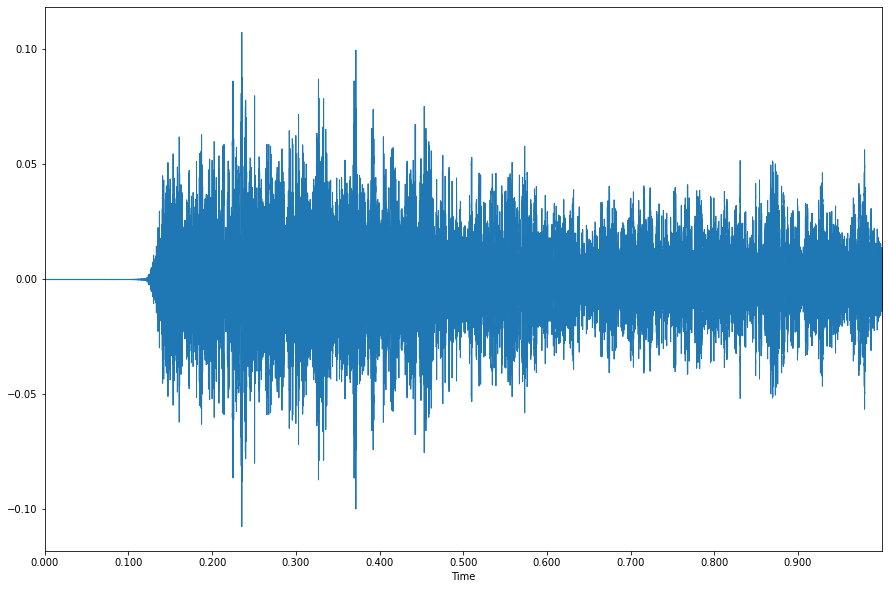

In [30]:
plt.figure(figsize=(15,10))
librosa.display.waveplot(audio,sr=sample_rate)

In [31]:
ipd.Audio(sample)

In [58]:
print(audio)

[-0.20134625 -0.35266036 -0.25955844 ... -0.23014638 -0.03787709
  0.07805829]


In [59]:
audio.shape

(22050,)

In [48]:
find=pd.DataFrame(columns=["speaker","input"])

In [43]:
add_path="/content/drive/MyDrive/16000_pcm_speeches"

In [44]:
leaders=["Benjamin_Netanyau",
         "Jens_Stoltenberg",
         "Julia_Gillard",
         "Magaret_Tarcher",
         "Nelson_Mandela"]

In [49]:
dataset=[]
k=0
for i in leaders:
  dataset=os.listdir(add_path+"/"+i)
  for j in dataset:
    find.loc[k]=[i,j]
    k+=1
find.head()
    

,speaker,input
0,Benjamin_Netanyau,1331.wav
1,Benjamin_Netanyau,498.wav
2,Benjamin_Netanyau,1183.wav
3,Benjamin_Netanyau,140.wav
4,Benjamin_Netanyau,942.wav


In [50]:
find.tail()

,speaker,input
7496,Nelson_Mandela,756.wav
7497,Nelson_Mandela,868.wav
7498,Nelson_Mandela,1399.wav
7499,Nelson_Mandela,1018.wav
7500,Nelson_Mandela,193.wav


In [60]:
mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 44)


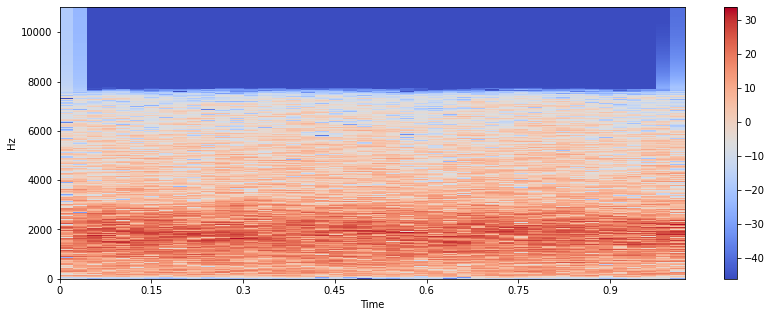

In [61]:
X = librosa.stft(audio)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

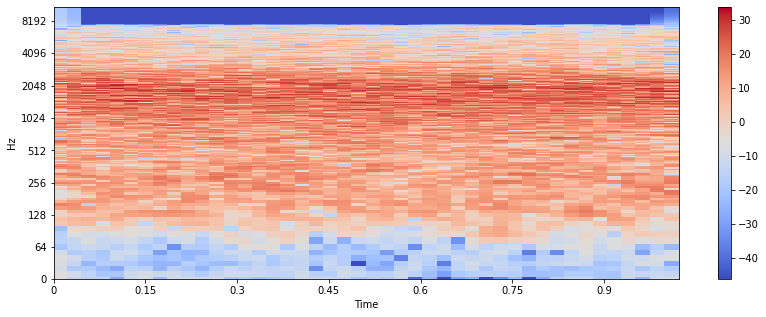

In [66]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

In [62]:
final_data=pd.DataFrame(columns=["Feature"])

In [64]:
k=0
X=[]
for i in range(len(find)):
  audio,sample_rate=librosa.load(add_path+"/"+find["speaker"][i]+"/"+find["input"][i])
  mfccs=librosa.feature.mfcc(y=audio,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs.T,axis=0)
  X.append(mfccs_scaled_features)

In [65]:
extracted_features_df=pd.DataFrame(X,columns=[i for i in range(40)])
extracted_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-272.684753,110.331367,-34.553535,55.589882,15.444584,31.536882,-17.019102,6.498485,-15.272927,-6.956915,...,-2.816602,-5.642961,-1.557494,-7.780066,-3.768229,-6.236220,-3.130119,-5.385392,-2.702135,-3.107173
1,-53.144943,127.700439,-149.202408,43.356888,-50.422287,41.284363,-50.807396,19.295477,-17.897028,-6.139625,...,-1.374395,-3.403657,2.491976,-6.611118,3.239056,-6.159173,3.529069,-4.225205,0.528560,-1.205829
2,-49.627758,117.065353,-149.596970,46.107857,-52.140823,42.369709,-49.071640,20.238493,-15.552606,-4.480415,...,-1.632687,-5.412260,1.303476,-7.371884,2.192609,-7.343357,2.639814,-5.568737,0.461297,-0.554588
3,-46.358822,126.976936,-150.495483,44.916645,-48.603638,37.792099,-50.999962,16.921122,-20.317482,-7.306465,...,0.091344,-4.104909,3.039900,-5.267569,4.324100,-4.370358,3.993285,-3.756721,-0.049640,-1.819872
4,-294.620483,100.353607,-26.290443,52.331120,-3.690579,29.014465,-7.239218,3.859882,-7.493390,-15.904813,...,-1.748887,-3.714919,-1.752243,-5.384678,2.339361,0.863289,-1.367947,-3.608172,-4.377960,-2.663002


In [67]:
extracted_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       7501 non-null   float32
 1   1       7501 non-null   float32
 2   2       7501 non-null   float32
 3   3       7501 non-null   float32
 4   4       7501 non-null   float32
 5   5       7501 non-null   float32
 6   6       7501 non-null   float32
 7   7       7501 non-null   float32
 8   8       7501 non-null   float32
 9   9       7501 non-null   float32
 10  10      7501 non-null   float32
 11  11      7501 non-null   float32
 12  12      7501 non-null   float32
 13  13      7501 non-null   float32
 14  14      7501 non-null   float32
 15  15      7501 non-null   float32
 16  16      7501 non-null   float32
 17  17      7501 non-null   float32
 18  18      7501 non-null   float32
 19  19      7501 non-null   float32
 20  20      7501 non-null   float32
 21  21      7501 non-null   float32
 22  

In [68]:
extracted_features_df["speaker"]=find["speaker"]
extracted_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,speaker
0,-272.684753,110.331367,-34.553535,55.589882,15.444584,31.536882,-17.019102,6.498485,-15.272927,-6.956915,...,-5.642961,-1.557494,-7.780066,-3.768229,-6.236220,-3.130119,-5.385392,-2.702135,-3.107173,Benjamin_Netanyau
1,-53.144943,127.700439,-149.202408,43.356888,-50.422287,41.284363,-50.807396,19.295477,-17.897028,-6.139625,...,-3.403657,2.491976,-6.611118,3.239056,-6.159173,3.529069,-4.225205,0.528560,-1.205829,Benjamin_Netanyau
2,-49.627758,117.065353,-149.596970,46.107857,-52.140823,42.369709,-49.071640,20.238493,-15.552606,-4.480415,...,-5.412260,1.303476,-7.371884,2.192609,-7.343357,2.639814,-5.568737,0.461297,-0.554588,Benjamin_Netanyau
3,-46.358822,126.976936,-150.495483,44.916645,-48.603638,37.792099,-50.999962,16.921122,-20.317482,-7.306465,...,-4.104909,3.039900,-5.267569,4.324100,-4.370358,3.993285,-3.756721,-0.049640,-1.819872,Benjamin_Netanyau
4,-294.620483,100.353607,-26.290443,52.331120,-3.690579,29.014465,-7.239218,3.859882,-7.493390,-15.904813,...,-3.714919,-1.752243,-5.384678,2.339361,0.863289,-1.367947,-3.608172,-4.377960,-2.663002,Benjamin_Netanyau


In [69]:
extracted_features_df.shape

(7501, 41)

In [70]:
import tensorflow
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
Y=to_categorical(labelencoder.fit_transform(extracted_features_df["speaker"]))
Y

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.]], dtype=float32)

In [71]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(extracted_features_df.iloc[:,:-1],Y,test_size=0.2,random_state=15)

In [73]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(6000, 40) (1501, 40) (6000, 5) (1501, 5)


In [74]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.4))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.4))

###final layer
model.add(Dense(5))
model.add(Activation('softmax'))

In [75]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [76]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [87]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

history=model.fit(X_train, Y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, Y_test), callbacks=[checkpointer], verbose=1)


Epoch 1/100
185/188 [============================>.] - ETA: 0s - loss: 0.0219 - accuracy: 0.9939
Epoch 1: val_loss improved from inf to 0.00532, saving model to saved_models/audio_classification.hdf5
188/188 [==============================] - 1s 4ms/step - loss: 0.0216 - accuracy: 0.9940 - val_loss: 0.0053 - val_accuracy: 0.9987
Epoch 2/100
183/188 [============================>.] - ETA: 0s - loss: 0.0203 - accuracy: 0.9950
Epoch 2: val_loss improved from 0.00532 to 0.00353, saving model to saved_models/audio_classification.hdf5
188/188 [==============================] - 1s 4ms/step - loss: 0.0198 - accuracy: 0.9952 - val_loss: 0.0035 - val_accuracy: 0.9987
Epoch 3/100
176/188 [===========================>..] - ETA: 0s - loss: 0.0091 - accuracy: 0.9968
Epoch 3: val_loss did not improve from 0.00353
188/188 [==============================] - 1s 4ms/step - loss: 0.0091 - accuracy: 0.9967 - val_loss: 0.0041 - val_accuracy: 0.9973
Epoch 4/100
173/188 [==========================>...] - ETA:

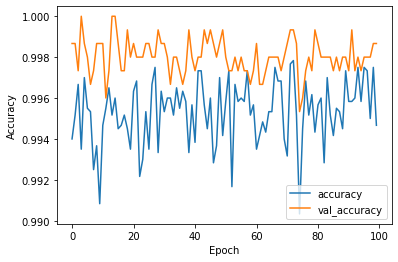

In [91]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')